In [1]:
using thesis
using Plots
using JLD
using LinearAlgebra
using DataFrames
using StatsPlots
using CSV

In [42]:
# 10 days simulations, c1d0s3
instrument = ["lspe_wmap" "lspe_planck" "lspe_planck_wmap"]
error = ["1arcsec" "30arcsec" "1arcmin"]
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]

data = Dict()
for i in instrument
    buffer = Dict()
    for e in error
        buffer[e] = JLD.load("fgbuster/results_"*i*"_"*e*".jld")
    end
    data[i] = buffer
end

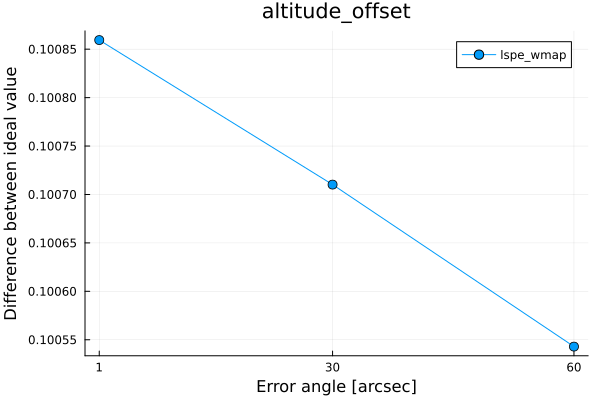

In [56]:
l = "altitude_offset"
i = "lspe_wmap"

ideal = [data[i][k]["ideal"]["x"][3] for k in error]
ideal_sigma = [ sqrt.(diag(data[i][k]["ideal"]["Sigma"]))[3] for k in error]
plot_data = [data[i][k][l]["x"][3] for k in error]
plot_x = [1.0/3600, 0.5/60, 1.0/60]
data_sigma = [ sqrt.(diag(data[i][k][l]["Sigma"]))[3] for k in error]

yerror = sqrt.(ideal_sigma.^2 .+ data_sigma.^2)

plot(plot_x, [abs.(ideal .- plot_data)...], marker=(:circle,5), label = i)#, yerror = yerror)

plot!(xticks = ([plot_x...],["1", "30", "60"]))
xaxis!("Error angle [arcsec]")
yaxis!("Difference between ideal value")
title!(l)

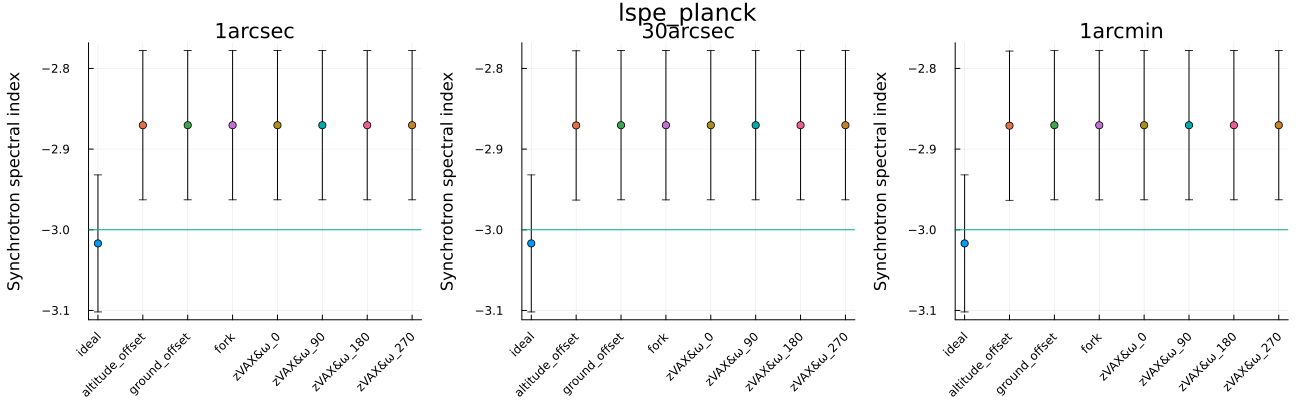

In [78]:
experiment = "lspe_planck"

plots = []
for e in error 
    a = scatter(["ideal"], [data[experiment][e]["ideal"]["x"][3]], yerr = sqrt.(diag(data[experiment][e]["ideal"]["Sigma"]))[3], legend = false)
    for i in labels
        a = scatter!([i], [data[experiment][e][i]["x"][3]], yerr = sqrt.(diag(data[experiment][e][i]["Sigma"]))[3])
    end  
    a = hline!([-3], label = "PySM value")
    a = title!(e)
    push!(plots, a)
end
plot(plots..., size = (1300, 400), plot_title = experiment, layout=(1,3), xrotation=45, bottom_margin = 11Plots.mm, left_margin = 7Plots.mm,link=:y)
yaxis!("Synchrotron spectral index")
#savefig("../results/fgbuster/"*instrument*"/sync_indx.pdf")


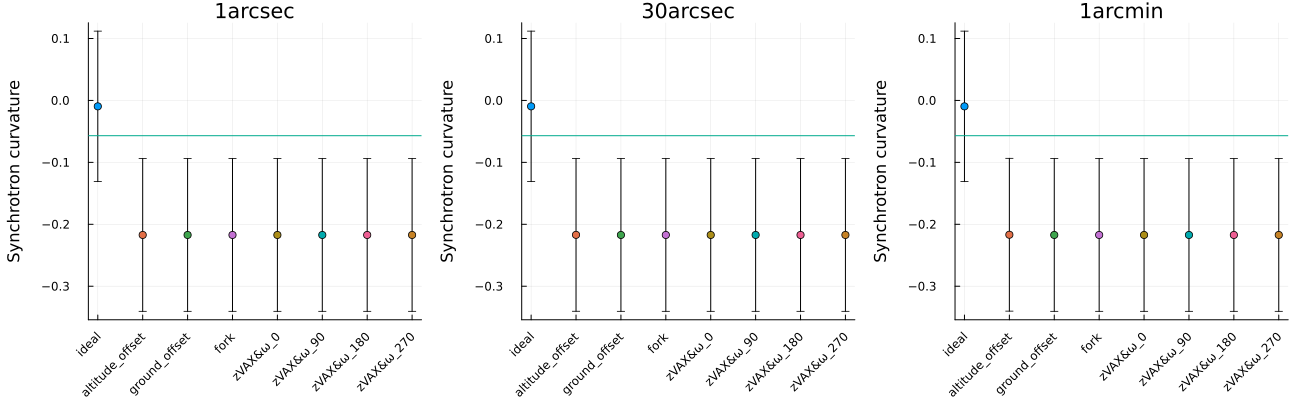

In [59]:
plots = []
for e in error 
    a = scatter(["ideal"], [data[experiment][e]["ideal"]["x"][4]], yerr = sqrt.(diag(data[experiment][e]["ideal"]["Sigma"]))[4], legend = false)
    for i in labels
        a = scatter!([i], [data[experiment][e][i]["x"][4]], yerr = sqrt.(diag(data[experiment][e][i]["Sigma"]))[4])
    end  
    a = hline!([-0.057], label = "PySM value")
    a = title!(e)
    push!(plots, a)
end
plot(plots..., size = (1300, 400), layout=(1,3), xrotation=45, bottom_margin = 11Plots.mm, left_margin = 7Plots.mm, link=:y)
yaxis!("Synchrotron curvature")
#savefig("../results/fgbuster/"*instrument*"/sync_indx.pdf")